In [98]:
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns



## Generate Cities List

In [99]:
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

## Perform API Calls

In [100]:
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df


,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [92]:
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        # Avoid repeating cities
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            # Append data to df columns
            cities_df.set_value(record, "city_name", city_name)
            cities_df.set_value(record, "country_code", country_code)
            cities_df.set_value(record, "rand_lat", rand_lat)
            cities_df.set_value(record, "rand_lng", rand_lng)
            cities_df.set_value(record, "Latitude", latitude)
            cities_df.set_value(record, "Longitude", longitude)
            cities_df.set_value(record, "Temp (F)", temp)
            cities_df.set_value(record, "Humidity (%)", humidity)
            cities_df.set_value(record, "Cloudiness (%)", cloud)
            cities_df.set_value(record, "Wind Speed (mph)", wind)

            record += 1
        
            # Wait between 1-4 seconds before next loop
            time.sleep(random.randint(1, 4))
        else:
            pass
    else:
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

------------------------------
Data Retrieval Complete
------------------------------



,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,xining,cn,33.48,100.21,36.62,101.77,55.31,99,92,3.6
1,pisco,pe,-27.21,-98.61,-13.71,-76.2,60.8,87,0,13.87
2,provideniya,ru,54.01,-171.17,64.42,-173.23,48.2,76,75,13.42
3,bontang,id,1.41,119.2,0.12,117.47,78.35,100,80,6.62
4,barrow,us,74.1,-162.29,39.51,-90.4,80.08,69,1,3.36


In [93]:
# Save the DataFrame as a csv
cities_df.to_csv("Output.csv", encoding="utf-8", index=False)

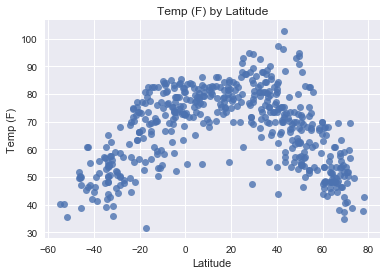

In [94]:
# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities_df, fit_reg=False).set_title('Temp (F) by Latitude')

plt.savefig("Output.png")

plt.show()

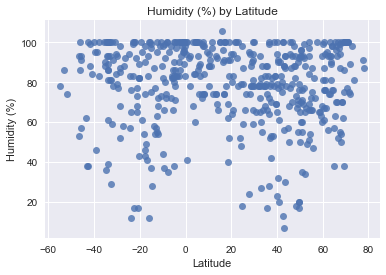

In [95]:
# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_df, fit_reg=False).set_title('Humidity (%) by Latitude')

plt.savefig("Output.png")

plt.show()

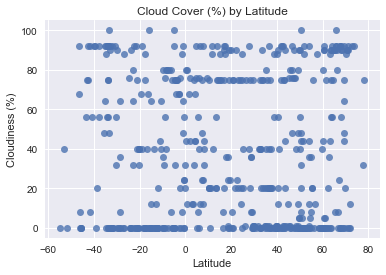

In [96]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness (%)", data=cities_df, fit_reg=False).set_title('Cloud Cover (%) by Latitude')

plt.savefig("Output.png")

plt.show()

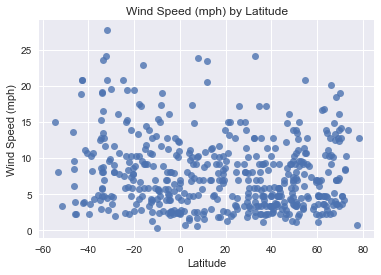

In [97]:
# Build a scatter plot City Latitude vs. Wind Speed
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed (mph)", data=cities_df, fit_reg=False).set_title('Wind Speed (mph) by Latitude')

plt.savefig("Output.png")

plt.show()